In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px

In [2]:
df=pd.read_csv("Hospital ER_Data.csv");

In [3]:
df.head()

Patient Id Patient Admission Date Patient First Inital Patient Last Name  \
0  145-39-5406       20-03-2024 08:47                    H         Glasspool   
1  316-34-3057       15-06-2024 11:29                    X           Methuen   
2  897-46-3852       20-06-2024 09:13                    P         Schubuser   
3  358-31-9711       04-02-2024 22:34                    U          Titcombe   
4  289-26-0537       04-09-2024 17:48                    Y       Gionettitti   

  Patient Gender  Patient Age                   Patient Race  \
0              M           69                          White   
1              M            4  Native American/Alaska Native   
2              F           56               African American   
3              F           24  Native American/Alaska Native   
4              M            5               African American   

  Department Referral  Patient Admission Flag  Patient Satisfaction Score  \
0                 NaN                   False                        10.0   
1                 NaN                    True                         NaN   
2    General Practice                    True                         9.0   
3    General Practice                    True                         8.0   
4         Orthopedics                   False                         NaN   

   Patient Waittime  Patients CM  
0                39            0  
1                27            0  
2                55            0  
3                31            0  
4                10            0

In [4]:
df.tail()

Patient Id Patient Admission Date Patient First Inital  \
9211  313-21-4953       28-08-2024 17:38                    J   
9212  226-92-3412       28-06-2024 23:12                    G   
9213  412-85-3832       16-05-2024 17:06                    V   
9214  708-91-2439       14-05-2024 23:43                    S   
9215  249-47-9666       01-03-2024 08:50                    Y   

     Patient Last Name Patient Gender  Patient Age          Patient Race  \
9211         Spradbrow             NC           42                 Asian   
9212          Antoniak             NC           19                 Asian   
9213          Riccardo             NC           14                 Asian   
9214            Renals             NC           73  Declined to Identify   
9215             Greep             NC           35                 White   

     Department Referral  Patient Admission Flag  Patient Satisfaction Score  \
9211    General Practice                    True                         NaN   
9212                 NaN                    True                         NaN   
9213                 NaN                    True                         NaN   
9214    General Practice                    True                         1.0   
9215    General Practice                    True                         NaN   

      Patient Waittime  Patients CM  
9211                43            0  
9212                49            0  
9213                36            0  
9214                38            0  
9215                39            0

In [5]:
df.columns

Index(['Patient Id', 'Patient Admission Date', 'Patient First Inital',
       'Patient Last Name', 'Patient Gender', 'Patient Age', 'Patient Race',
       'Department Referral', 'Patient Admission Flag',
       'Patient Satisfaction Score', 'Patient Waittime', 'Patients CM'],
      dtype='object')

In [6]:
df.shape

(9216, 12)

In [7]:
df.dtypes

Patient Id                     object
Patient Admission Date         object
Patient First Inital           object
Patient Last Name              object
Patient Gender                 object
Patient Age                     int64
Patient Race                   object
Department Referral            object
Patient Admission Flag           bool
Patient Satisfaction Score    float64
Patient Waittime                int64
Patients CM                     int64
dtype: object

In [8]:
df.isnull().sum()

Patient Id                       0
Patient Admission Date           0
Patient First Inital             0
Patient Last Name                0
Patient Gender                   0
Patient Age                      0
Patient Race                     0
Department Referral           5400
Patient Admission Flag           0
Patient Satisfaction Score    6699
Patient Waittime                 0
Patients CM                      0
dtype: int64

In [9]:
df[df["Patient Satisfaction Score"].isnull()]

Patient Id Patient Admission Date Patient First Inital  \
1     316-34-3057       15-06-2024 11:29                    X   
4     289-26-0537       04-09-2024 17:48                    Y   
5     255-51-2877       20-04-2023 00:13                    H   
6     465-97-0990       23-08-2023 08:26                    F   
7     157-31-7520       29-07-2023 16:57                    K   
...           ...                    ...                  ...   
9210  821-25-7925       23-08-2024 14:32                    Y   
9211  313-21-4953       28-08-2024 17:38                    J   
9212  226-92-3412       28-06-2024 23:12                    G   
9213  412-85-3832       16-05-2024 17:06                    V   
9215  249-47-9666       01-03-2024 08:50                    Y   

     Patient Last Name Patient Gender  Patient Age  \
1              Methuen              M            4   
4          Gionettitti              M            5   
5                 Buff              M           58   
6               Perrat              F           68   
7              Gwillim              F           47   
...                ...            ...          ...   
9210           Donovan             NC           73   
9211         Spradbrow             NC           42   
9212          Antoniak             NC           19   
9213          Riccardo             NC           14   
9215             Greep             NC           35   

                       Patient Race Department Referral  \
1     Native American/Alaska Native                 NaN   
4                  African American         Orthopedics   
5                             Asian                 NaN   
6                             White                 NaN   
7                 Two or More Races                 NaN   
...                             ...                 ...   
9210               African American                 NaN   
9211                          Asian    General Practice   
9212                          Asian                 NaN   
9213                          Asian                 NaN   
9215                          White    General Practice   

      Patient Admission Flag  Patient Satisfaction Score  Patient Waittime  \
1                       True                         NaN                27   
4                      False                         NaN                10   
5                      False                         NaN                59   
6                       True                         NaN                43   
7                       True                         NaN                23   
...                      ...                         ...               ...   
9210                    True                         NaN                30   
9211                    True                         NaN                43   
9212                    True                         NaN                49   
9213                    True                         NaN                36   
9215                    True                         NaN                39   

      Patients CM  
1               0  
4               0  
5               0  
6               0  
7               0  
...           ...  
9210            0  
9211            0  
9212            0  
9213            0  
9215            0  

[6699 rows x 12 columns]

In [10]:
df[df.isnull().any(axis=1)]

Patient Id Patient Admission Date Patient First Inital  \
0     145-39-5406       20-03-2024 08:47                    H   
1     316-34-3057       15-06-2024 11:29                    X   
4     289-26-0537       04-09-2024 17:48                    Y   
5     255-51-2877       20-04-2023 00:13                    H   
6     465-97-0990       23-08-2023 08:26                    F   
...           ...                    ...                  ...   
9210  821-25-7925       23-08-2024 14:32                    Y   
9211  313-21-4953       28-08-2024 17:38                    J   
9212  226-92-3412       28-06-2024 23:12                    G   
9213  412-85-3832       16-05-2024 17:06                    V   
9215  249-47-9666       01-03-2024 08:50                    Y   

     Patient Last Name Patient Gender  Patient Age  \
0            Glasspool              M           69   
1              Methuen              M            4   
4          Gionettitti              M            5   
5                 Buff              M           58   
6               Perrat              F           68   
...                ...            ...          ...   
9210           Donovan             NC           73   
9211         Spradbrow             NC           42   
9212          Antoniak             NC           19   
9213          Riccardo             NC           14   
9215             Greep             NC           35   

                       Patient Race Department Referral  \
0                             White                 NaN   
1     Native American/Alaska Native                 NaN   
4                  African American         Orthopedics   
5                             Asian                 NaN   
6                             White                 NaN   
...                             ...                 ...   
9210               African American                 NaN   
9211                          Asian    General Practice   
9212                          Asian                 NaN   
9213                          Asian                 NaN   
9215                          White    General Practice   

      Patient Admission Flag  Patient Satisfaction Score  Patient Waittime  \
0                      False                        10.0                39   
1                       True                         NaN                27   
4                      False                         NaN                10   
5                      False                         NaN                59   
6                       True                         NaN                43   
...                      ...                         ...               ...   
9210                    True                         NaN                30   
9211                    True                         NaN                43   
9212                    True                         NaN                49   
9213                    True                         NaN                36   
9215                    True                         NaN                39   

      Patients CM  
0               0  
1               0  
4               0  
5               0  
6               0  
...           ...  
9210            0  
9211            0  
9212            0  
9213            0  
9215            0  

[8139 rows x 12 columns]

In [11]:
df.isnull()

Patient Id  Patient Admission Date  Patient First Inital  \
0          False                   False                 False   
1          False                   False                 False   
2          False                   False                 False   
3          False                   False                 False   
4          False                   False                 False   
...          ...                     ...                   ...   
9211       False                   False                 False   
9212       False                   False                 False   
9213       False                   False                 False   
9214       False                   False                 False   
9215       False                   False                 False   

      Patient Last Name  Patient Gender  Patient Age  Patient Race  \
0                 False           False        False         False   
1                 False           False        False         False   
2                 False           False        False         False   
3                 False           False        False         False   
4                 False           False        False         False   
...                 ...             ...          ...           ...   
9211              False           False        False         False   
9212              False           False        False         False   
9213              False           False        False         False   
9214              False           False        False         False   
9215              False           False        False         False   

      Department Referral  Patient Admission Flag  Patient Satisfaction Score  \
0                    True                   False                       False   
1                    True                   False                        True   
2                   False                   False                       False   
3                   False                   False                       False   
4                   False                   False                        True   
...                   ...                     ...                         ...   
9211                False                   False                        True   
9212                 True                   False                        True   
9213                 True                   False                        True   
9214                False                   False                       False   
9215                False                   False                        True   

      Patient Waittime  Patients CM  
0                False        False  
1                False        False  
2                False        False  
3                False        False  
4                False        False  
...                ...          ...  
9211             False        False  
9212             False        False  
9213             False        False  
9214             False        False  
9215             False        False  

[9216 rows x 12 columns]

In [12]:
df.isnull()

Patient Id  Patient Admission Date  Patient First Inital  \
0          False                   False                 False   
1          False                   False                 False   
2          False                   False                 False   
3          False                   False                 False   
4          False                   False                 False   
...          ...                     ...                   ...   
9211       False                   False                 False   
9212       False                   False                 False   
9213       False                   False                 False   
9214       False                   False                 False   
9215       False                   False                 False   

      Patient Last Name  Patient Gender  Patient Age  Patient Race  \
0                 False           False        False         False   
1                 False           False        False         False   
2                 False           False        False         False   
3                 False           False        False         False   
4                 False           False        False         False   
...                 ...             ...          ...           ...   
9211              False           False        False         False   
9212              False           False        False         False   
9213              False           False        False         False   
9214              False           False        False         False   
9215              False           False        False         False   

      Department Referral  Patient Admission Flag  Patient Satisfaction Score  \
0                    True                   False                       False   
1                    True                   False                        True   
2                   False                   False                       False   
3                   False                   False                       False   
4                   False                   False                        True   
...                   ...                     ...                         ...   
9211                False                   False                        True   
9212                 True                   False                        True   
9213                 True                   False                        True   
9214                False                   False                       False   
9215                False                   False                        True   

      Patient Waittime  Patients CM  
0                False        False  
1                False        False  
2                False        False  
3                False        False  
4                False        False  
...                ...          ...  
9211             False        False  
9212             False        False  
9213             False        False  
9214             False        False  
9215             False        False  

[9216 rows x 12 columns]

In [13]:
df.isnull().sum().sum()

np.int64(12099)

In [14]:
df["Patient Satisfaction Score"]=df["Patient Satisfaction Score"].fillna(df["Patient Satisfaction Score"].mean())

In [15]:
df["Patient Satisfaction Score"]

0       10.000000
1        4.992054
2        9.000000
3        8.000000
4        4.992054
          ...    
9211     4.992054
9212     4.992054
9213     4.992054
9214     1.000000
9215     4.992054
Name: Patient Satisfaction Score, Length: 9216, dtype: float64

In [16]:
df["Patient Satisfaction Score"].isnull().sum()

np.int64(0)

In [17]:
df["Department Referral"].isnull().sum()

np.int64(5400)

In [18]:
df=df.dropna(subset=["Department Referral"])

In [19]:
df["Department Referral"]

2       General Practice
3       General Practice
4            Orthopedics
10      Gastroenterology
11           Orthopedics
              ...       
9208               Renal
9209               Renal
9211    General Practice
9214    General Practice
9215    General Practice
Name: Department Referral, Length: 3816, dtype: object

In [20]:
df.isnull().sum()

Patient Id                    0
Patient Admission Date        0
Patient First Inital          0
Patient Last Name             0
Patient Gender                0
Patient Age                   0
Patient Race                  0
Department Referral           0
Patient Admission Flag        0
Patient Satisfaction Score    0
Patient Waittime              0
Patients CM                   0
dtype: int64

In [21]:
df.describe()

Patient Age  Patient Satisfaction Score  Patient Waittime  Patients CM
count  3816.000000                 3816.000000       3816.000000  3816.000000
mean     39.837526                    5.006613         35.212788     0.049528
std      22.778581                    1.679809         14.903334     0.216997
min       1.000000                    0.000000         10.000000     0.000000
25%      20.000000                    4.992054         22.000000     0.000000
50%      39.000000                    4.992054         35.000000     0.000000
75%      60.000000                    4.992054         48.000000     0.000000
max      79.000000                   10.000000         60.000000     1.000000

In [22]:
df["Patient Age"].mean()

np.float64(39.837526205450736)

In [23]:
df["Patient Age"].median()

39.0

In [24]:
df["Patient Age"].min()

1

In [25]:
df["Patient Age"].max()

79

In [26]:
df.to_csv('output.csv', index=False)

# Visualization

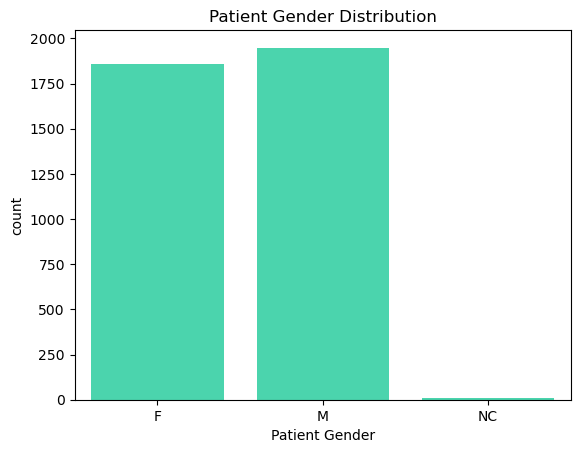

In [43]:
# Gender Distribution
sns.countplot(x='Patient Gender', data=df , color='#34ebb7')
plt.title("Patient Gender Distribution")
plt.show()


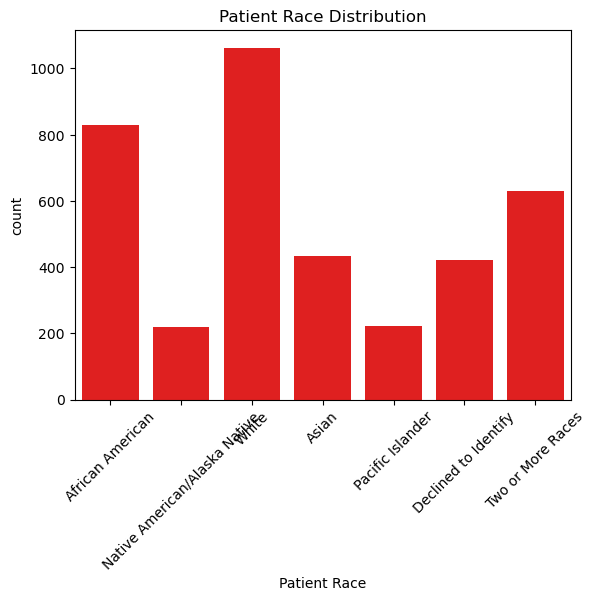

In [28]:
# Race Distrubution
sns.countplot(x='Patient Race', data=df, color='red')
plt.title("Patient Race Distribution")
plt.xticks(rotation=45)
plt.show()


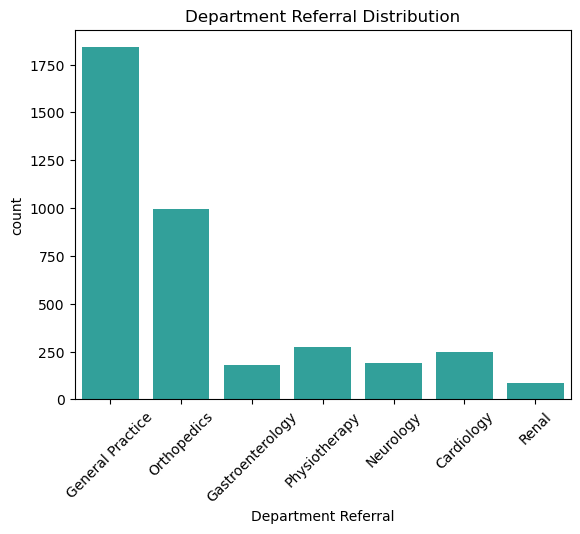

In [29]:
# Department Referrals Count
sns.countplot(x='Department Referral', data=df, color='#20B2AA')
plt.title("Department Referral Distribution")
plt.xticks(rotation=45)
plt.show()

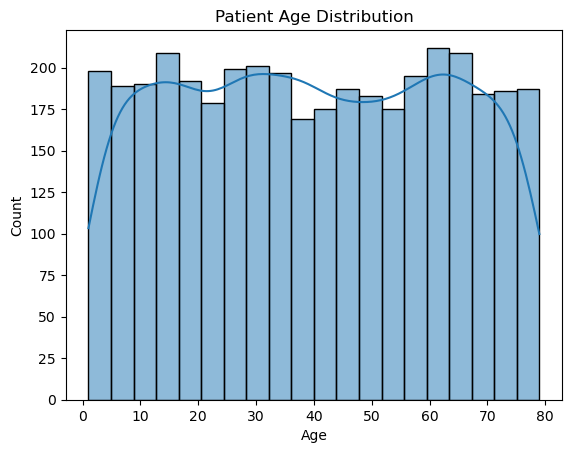

In [30]:
# Patient Age Distribution
sns.histplot(df['Patient Age'], kde=True, bins=20)
plt.title("Patient Age Distribution")
plt.xlabel("Age")
plt.show()

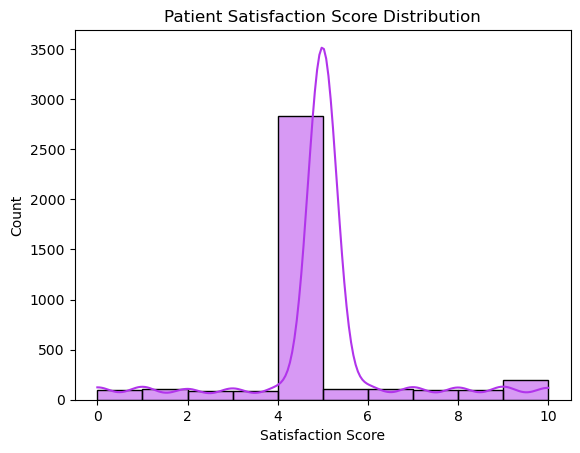

In [52]:
# Satisfaction Score Distribution
sns.histplot(df['Patient Satisfaction Score'], kde=True, bins=10, color="#b134eb")
plt.title("Patient Satisfaction Score Distribution")
plt.xlabel("Satisfaction Score")
plt.show()

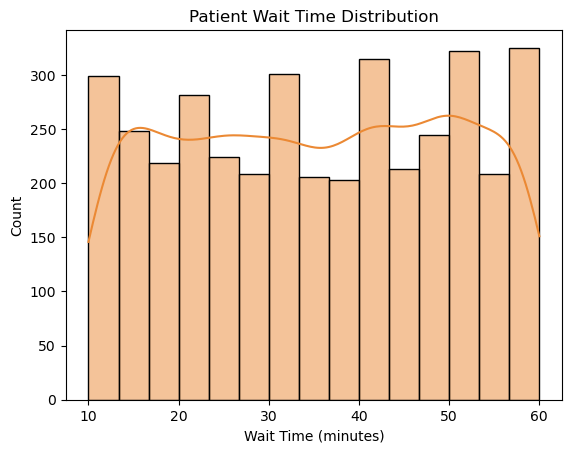

In [51]:
# Wait Time Distribution
sns.histplot(df['Patient Waittime'], kde=True, bins=15, color="#eb8934")
plt.title("Patient Wait Time Distribution")
plt.xlabel("Wait Time (minutes)")
plt.show()

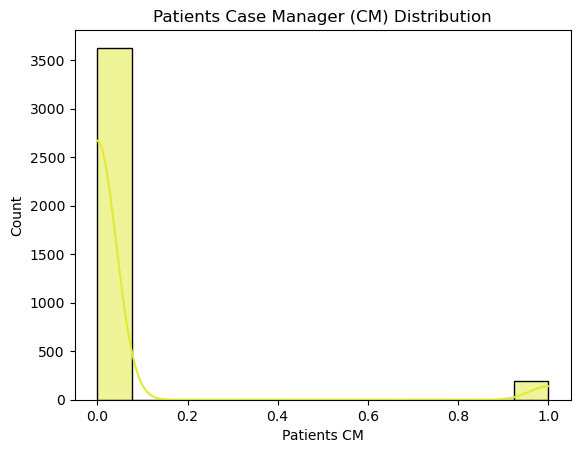

In [50]:
# Patients CM Distribution
sns.histplot(df['Patients CM'], kde=True, color="#e1eb34")
plt.title("Patients Case Manager (CM) Distribution")
plt.show()

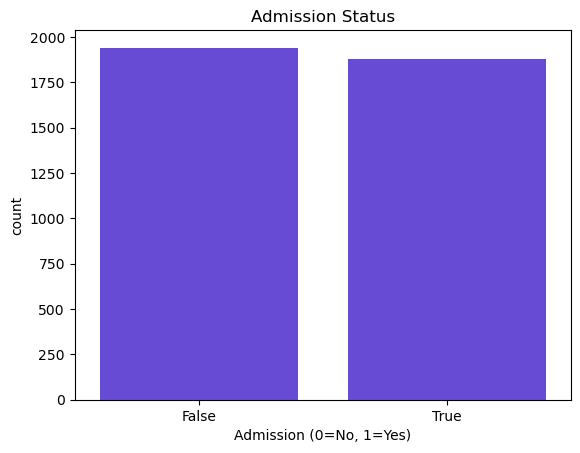

In [49]:
# Admission Flag (0/1) Count
sns.countplot(x='Patient Admission Flag', data=df, color="#5b34eb")
plt.title("Admission Status")
plt.xlabel("Admission (0=No, 1=Yes)")
plt.show()

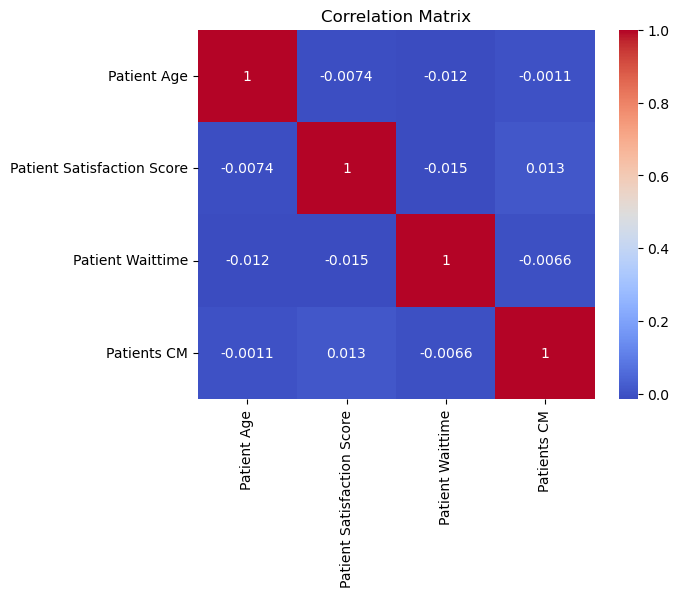

In [35]:
# Correlation Heatmap for Numeric Columns
numeric_cols = ['Patient Age', 'Patient Satisfaction Score', 'Patient Waittime', 'Patients CM']
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

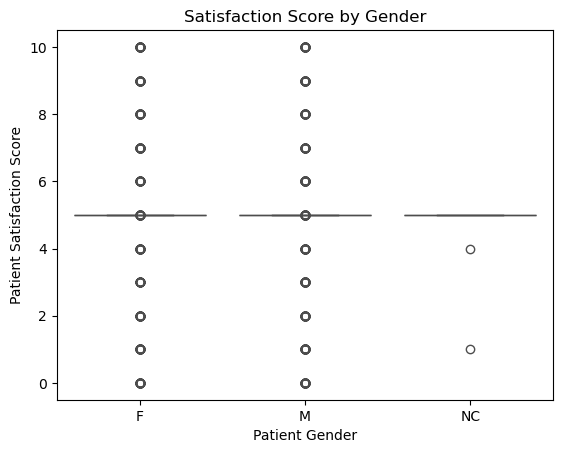

In [48]:
# Boxplot of Satisfaction Score by Gender
sns.boxplot(x='Patient Gender', y='Patient Satisfaction Score', data=df, color='blue')
plt.title("Satisfaction Score by Gender")
plt.show()

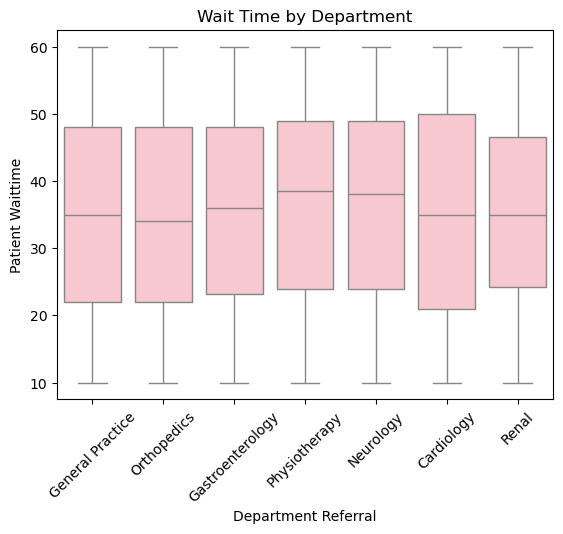

In [37]:
# Boxplot of Wait Time by Department
sns.boxplot(x='Department Referral', y='Patient Waittime', data=df, color="pink")
plt.title("Wait Time by Department")
plt.xticks(rotation=45)
plt.show()


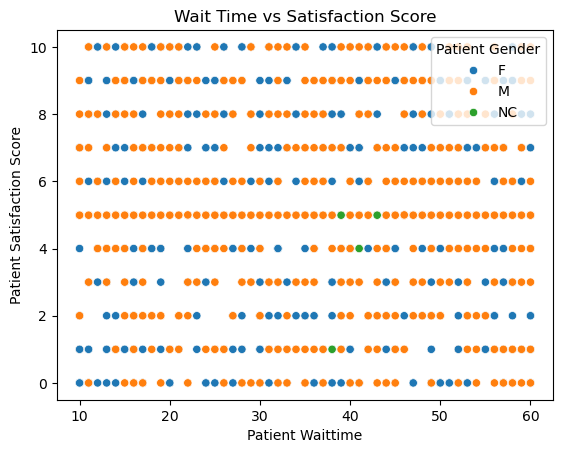

In [38]:
# Satisfaction Score vs Wait Time Scatterplot
sns.scatterplot(x='Patient Waittime', y='Patient Satisfaction Score', hue='Patient Gender', data=df)
plt.title("Wait Time vs Satisfaction Score")
plt.show()

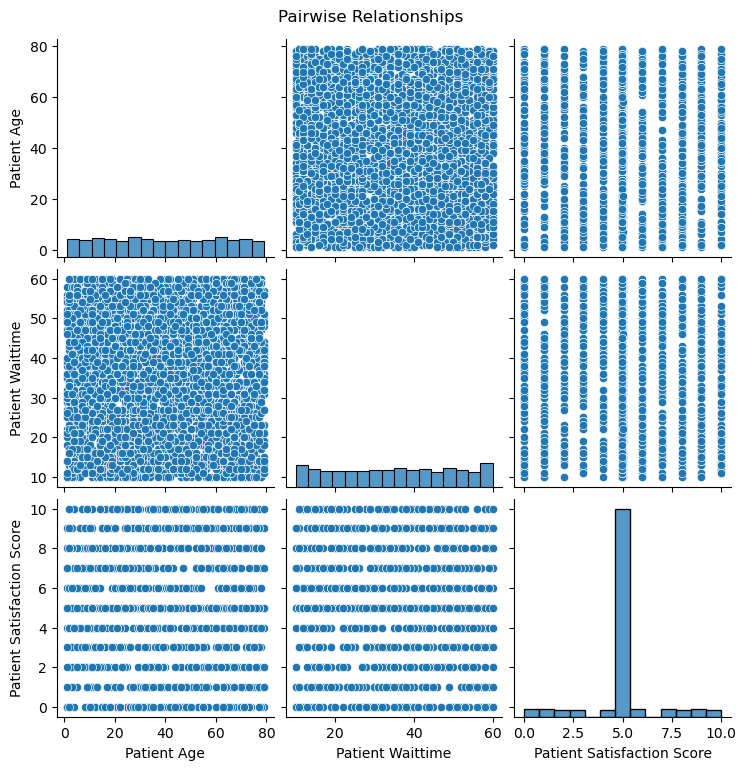

In [47]:
# 2D Pair Plot (Multi-variable scatter matrix)
sns.pairplot(df[["Patient Age", "Patient Waittime", "Patient Satisfaction Score"]])
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()

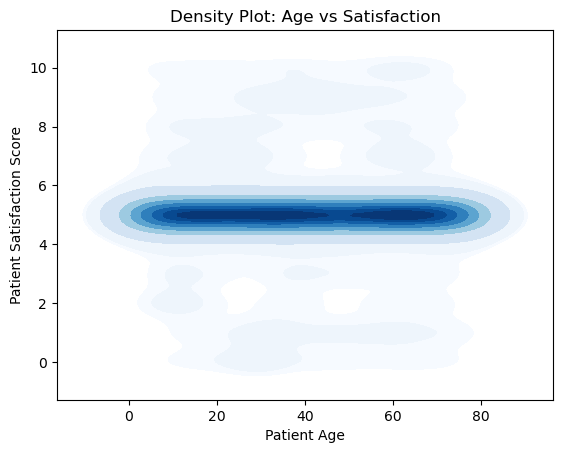

In [54]:
# 2D KDE Plot (Density Estimate)
sns.kdeplot(
    data=df, 
    x='Patient Age', 
    y='Patient Satisfaction Score', 
    fill=True, 
    cmap="Blues", 
    thresh=0.05, 
)
plt.title("Density Plot: Age vs Satisfaction")
plt.show()

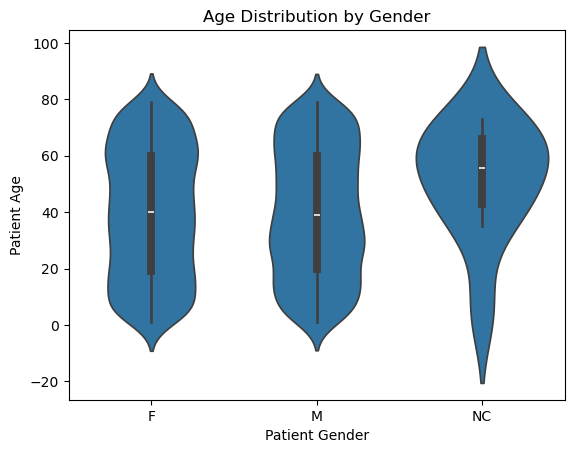

In [41]:
# 2D Violin Plot (Age distribution by Gender)
sns.violinplot(x="Patient Gender", y="Patient Age", data=df)
plt.title("Age Distribution by Gender")
plt.show()

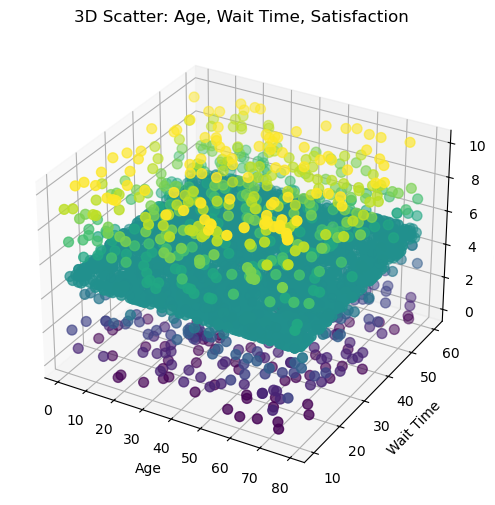

In [44]:
#  3D Scatter Plot (using Matplotlib)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    df["Patient Age"], 
    df["Patient Waittime"], 
    df["Patient Satisfaction Score"], 
    c=df["Patient Satisfaction Score"], cmap='viridis', s=50
)

ax.set_xlabel("Age")
ax.set_ylabel("Wait Time")
ax.set_zlabel("Satisfaction")
plt.title("3D Scatter: Age, Wait Time, Satisfaction")
plt.show()


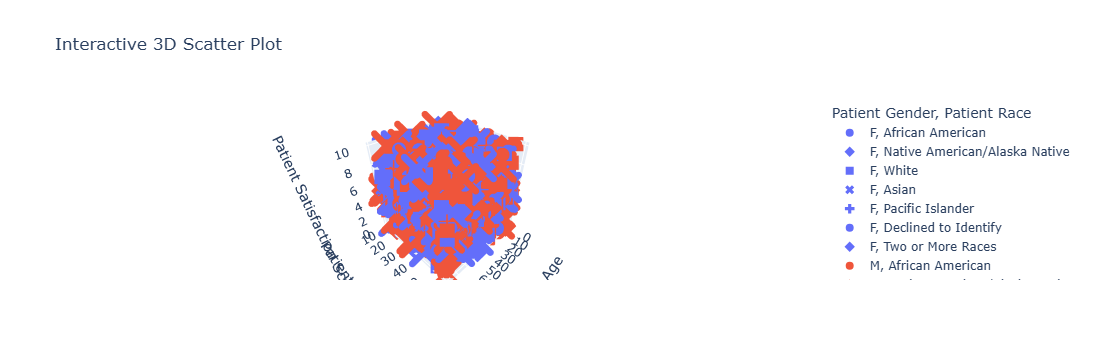

In [55]:
#  Interactive 3D Scatter Plot (using Plotly)
fig = px.scatter_3d(
    df, 
    x="Patient Age", 
    y="Patient Waittime", 
    z="Patient Satisfaction Score",
    color="Patient Gender",
    symbol="Patient Race",
    title="Interactive 3D Scatter Plot"
)
fig.show()


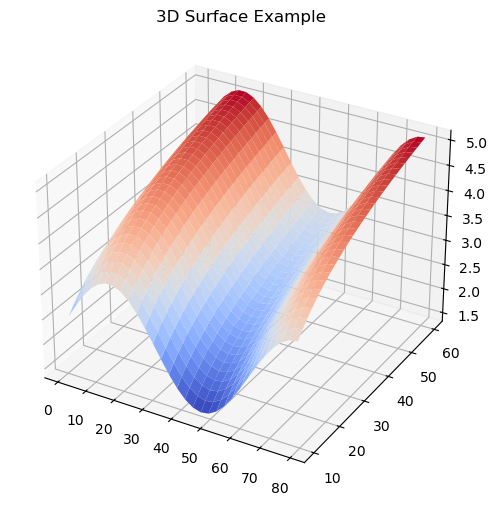

In [56]:
# 3D Surface Plot (Optional – synthetic for demo)
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np

# Create mesh grid for plotting
x = np.linspace(df["Patient Age"].min(), df["Patient Age"].max(), 30)
y = np.linspace(df["Patient Waittime"].min(), df["Patient Waittime"].max(), 30)
x, y = np.meshgrid(x, y)
z = np.sin(x / 10) + np.log1p(y)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm)
ax.set_title("3D Surface Example")
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_1780\1202348684.py:1: UserWarning:

Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



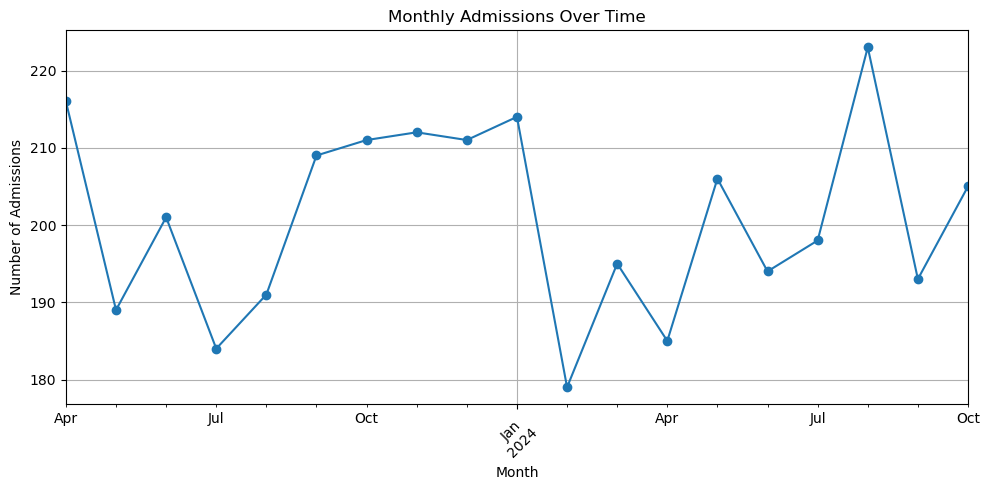

In [58]:
df['Admission Month'] = pd.to_datetime(df['Patient Admission Date']).dt.to_period('M')
monthly_admissions = df.groupby('Admission Month').size()
monthly_admissions.index = monthly_admissions.index.to_timestamp()

monthly_admissions.plot(marker='o', figsize=(10, 5))
plt.title("Monthly Admissions Over Time")
plt.ylabel("Number of Admissions")
plt.xlabel("Month")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Insight of Dataset

In [60]:
# Insight: Average Wait Time and Satisfaction by Department
dept_summary = df.groupby("Department Referral")[['Patient Waittime', 'Patient Satisfaction Score']].mean()
dept_summary = dept_summary.sort_values("Patient Waittime", ascending=False)
print("\n🔹 Department-wise Wait Time & Satisfaction:\n", dept_summary.head())


🔹 Department-wise Wait Time & Satisfaction:
                      Patient Waittime  Patient Satisfaction Score
Department Referral                                              
Neurology                   36.803109                    5.071956
Physiotherapy               36.565217                    4.990820
Gastroenterology            35.831461                    5.236038
Cardiology                  35.354839                    5.034651
Orthopedics                 34.982915                    4.953164


In [61]:
# Department with highest wait time
worst_dept = dept_summary['Patient Waittime'].idxmax()
print(f"⚠️ Department with highest average wait time: {worst_dept}")

⚠️ Department with highest average wait time: Neurology


In [66]:
#  Age Group Satisfaction
df['Age Group'] = pd.cut(df['Patient Age'], bins=[0, 18, 35, 50, 65, 120], labels=["0–18", "19–35", "36–50", "51–65", "66+"])
age_group_satisfaction = df.groupby("Age Group")["Patient Satisfaction Score"].mean().sort_values()
print("\n🎯 Average Satisfaction by Age Group:\n", age_group_satisfaction)


🎯 Average Satisfaction by Age Group:
 Age Group
66+      4.974415
19–35    4.983396
0–18     5.006674
36–50    5.030860
51–65    5.037426
Name: Patient Satisfaction Score, dtype: float64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_1780\880350882.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [67]:
lowest_group = age_group_satisfaction.idxmin()
print(f"⚠️ Lowest satisfaction in age group: {lowest_group}")

⚠️ Lowest satisfaction in age group: 66+


In [68]:
#  Racial Disparity in Satisfaction (if applicable)
race_satisfaction = df.groupby("Patient Race")["Patient Satisfaction Score"].mean().sort_values()
print("\n🧬 Average Satisfaction by Race:\n", race_satisfaction)


🧬 Average Satisfaction by Race:
 Patient Race
Declined to Identify             4.951429
Two or More Races                4.968902
Asian                            4.973410
African American                 5.017149
White                            5.024542
Pacific Islander                 5.079180
Native American/Alaska Native    5.085628
Name: Patient Satisfaction Score, dtype: float64


In [69]:
# Top and Bottom 5 Patients by Satisfaction
top5 = df[['Patient Id', 'Patient Satisfaction Score']].sort_values(by='Patient Satisfaction Score', ascending=False).head()
bottom5 = df[['Patient Id', 'Patient Satisfaction Score']].sort_values(by='Patient Satisfaction Score', ascending=True).head()
print("\n🏆 Top 5 Patients by Satisfaction:\n", top5)
print("\n❌ Bottom 5 Patients by Satisfaction:\n", bottom5)


🏆 Top 5 Patients by Satisfaction:
        Patient Id  Patient Satisfaction Score
1419  662-75-3787                        10.0
5175  206-29-8584                        10.0
5107  711-46-8034                        10.0
3484  691-25-6809                        10.0
1418  620-60-2232                        10.0

❌ Bottom 5 Patients by Satisfaction:
        Patient Id  Patient Satisfaction Score
76    621-85-6677                         0.0
8711  598-11-7544                         0.0
1380  511-46-2159                         0.0
1360  333-28-5802                         0.0
9161  503-18-9280                         0.0


# conclusion